# AR

In [1]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series = Series.from_csv('.\daily-minimum-temperatures.csv', header=0)
series.head()

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

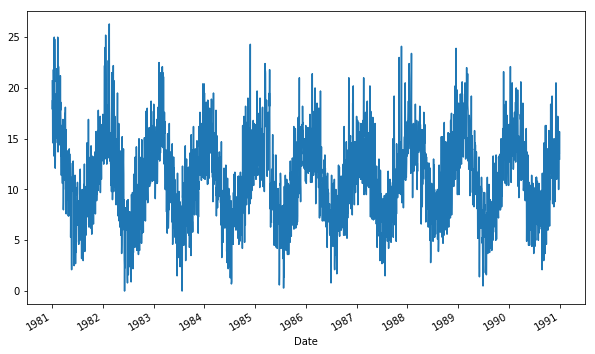

In [3]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


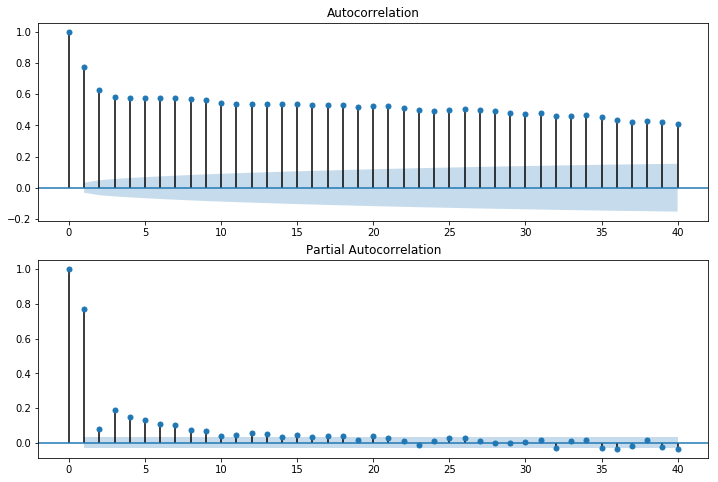

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

# Autoregression Model

In [5]:
from statsmodels.tsa.ar_model import AR

In [6]:
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2001:]

In [7]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-2001, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-2001], periods=2001, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1985-06-30', '1985-07-01', '1985-07-02', '1985-07-03',
               '1985-07-04', '1985-07-05', '1985-07-06', '1985-07-07',
               '1985-07-08', '1985-07-09'],
              dtype='datetime64[ns]', length=1646, freq='D')
DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')


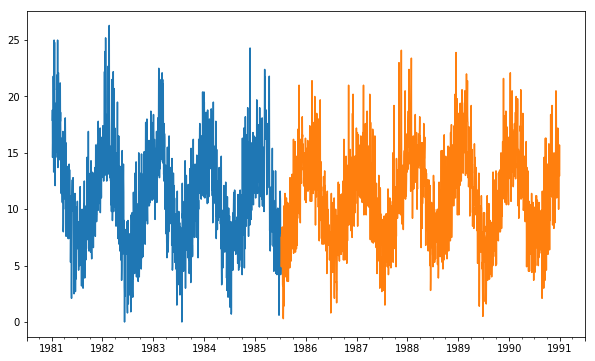

In [8]:
plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
plt.show()

In [9]:
print(len(train))
print(len(test))

1646
2001


In [10]:
model = AR(train)

In [11]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [12]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [13]:
from sklearn.metrics import mean_squared_error
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=7.738295, expected=7.500000
predicted=7.747052, expected=4.900000
predicted=7.343110, expected=5.900000
predicted=7.097824, expected=7.800000
predicted=7.093936, expected=5.800000
predicted=7.389590, expected=7.000000
predicted=7.692920, expected=8.400000
predicted=7.955183, expected=6.200000
predicted=7.893243, expected=7.500000
predicted=7.960929, expected=4.800000
predicted=8.182984, expected=3.300000
predicted=8.281968, expected=3.200000
predicted=8.449309, expected=7.000000
predicted=8.281219, expected=8.400000
predicted=8.154464, expected=0.300000
predicted=8.055823, expected=0.300000
predicted=8.002211, expected=2.100000
predicted=8.031101, expected=8.500000
predicted=8.030902, expected=1.400000
predicted=8.078643, expected=4.100000
predicted=8.121020, expected=10.300000
predicted=8.144461, expected=6.600000
predicted=8.155071, expected=6.100000
predicted=8.157473, expected=7.000000
predicted=8.184450, expected=5.100000
predicted=8.220490, expected=6.300000
predicted=8

predicted=10.486506, expected=14.300000
predicted=10.486509, expected=13.300000
predicted=10.486512, expected=16.700000
predicted=10.486516, expected=15.300000
predicted=10.486519, expected=14.300000
predicted=10.486522, expected=13.500000
predicted=10.486525, expected=15.000000
predicted=10.486528, expected=13.600000
predicted=10.486531, expected=15.200000
predicted=10.486534, expected=17.000000
predicted=10.486537, expected=18.700000
predicted=10.486540, expected=16.500000
predicted=10.486543, expected=17.400000
predicted=10.486545, expected=18.300000
predicted=10.486548, expected=18.300000
predicted=10.486551, expected=22.400000
predicted=10.486554, expected=21.400000
predicted=10.486556, expected=20.900000
predicted=10.486559, expected=17.600000
predicted=10.486562, expected=15.500000
predicted=10.486564, expected=16.600000
predicted=10.486567, expected=16.200000
predicted=10.486570, expected=15.600000
predicted=10.486572, expected=14.500000
predicted=10.486575, expected=14.000000


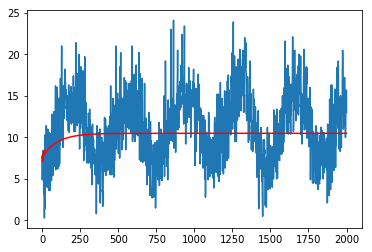

In [14]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# pandas

In [15]:
model = AR(trainS)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [16]:
model_fit = model.fit()

In [17]:
testS.index

DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')

In [18]:
predictions = model_fit.predict(start='1985-07-09',end='1990-12-30', dynamic=True)
predictions

1985-07-09     8.164979
1985-07-10     8.137249
1985-07-11     7.916977
1985-07-12     7.453769
1985-07-13     7.189459
1985-07-14     7.198919
1985-07-15     7.477094
1985-07-16     7.786770
1985-07-17     8.069249
1985-07-18     8.021870
1985-07-19     8.064157
1985-07-20     8.255817
1985-07-21     8.357122
1985-07-22     8.520817
1985-07-23     8.386297
1985-07-24     8.238178
1985-07-25     8.135671
1985-07-26     8.069439
1985-07-27     8.111722
1985-07-28     8.137661
1985-07-29     8.181042
1985-07-30     8.226856
1985-07-31     8.249380
1985-08-01     8.254479
1985-08-02     8.257864
1985-08-03     8.278814
1985-08-04     8.310957
1985-08-05     8.352570
1985-08-06     8.370820
1985-08-07     8.399684
                ...    
1990-12-01    10.486826
1990-12-02    10.486826
1990-12-03    10.486826
1990-12-04    10.486826
1990-12-05    10.486826
1990-12-06    10.486826
1990-12-07    10.486826
1990-12-08    10.486826
1990-12-09    10.486826
1990-12-10    10.486826
1990-12-11    10

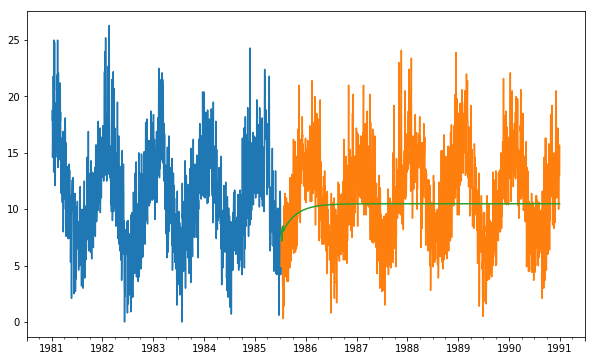

In [19]:
plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
predictions.plot()
plt.show()

In [20]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = AR(history)
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(history), end=(len(history)+1))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=7.738295, expected=7.500000
predicted=7.602570, expected=4.900000
predicted=5.641968, expected=5.900000
predicted=6.505617, expected=7.800000
predicted=7.452119, expected=5.800000
predicted=6.353841, expected=7.000000
predicted=7.446543, expected=8.400000
predicted=8.251573, expected=6.200000
predicted=6.598147, expected=7.500000
predicted=7.663741, expected=4.800000
predicted=6.029706, expected=3.300000
predicted=5.589981, expected=3.200000
predicted=5.500996, expected=7.000000
predicted=7.376267, expected=8.400000
predicted=7.602015, expected=0.300000
predicted=2.596745, expected=0.300000
predicted=3.532280, expected=2.100000
predicted=4.224756, expected=8.500000
predicted=7.508639, expected=1.400000
predicted=2.342885, expected=4.100000
predicted=5.498982, expected=10.300000
predicted=8.390430, expected=6.600000
predicted=5.725110, expected=6.100000
predicted=5.295464, expected=7.000000
predicted=6.747761, expected=5.100000
predicted=5.636402, expected=6.300000
predicted=6

predicted=13.868671, expected=14.400000
predicted=13.952028, expected=11.800000
predicted=12.488546, expected=15.800000
predicted=15.077152, expected=16.000000
predicted=14.645945, expected=11.800000
predicted=12.055057, expected=14.500000
predicted=14.234560, expected=10.700000
predicted=11.817143, expected=14.200000
predicted=14.334745, expected=19.500000
predicted=16.734586, expected=21.400000
predicted=17.713789, expected=17.900000
predicted=15.613441, expected=17.400000
predicted=16.275393, expected=12.700000
predicted=13.271640, expected=13.800000
predicted=14.754422, expected=14.000000
predicted=14.292153, expected=15.000000
predicted=15.145712, expected=14.500000
predicted=14.774572, expected=13.100000
predicted=13.796476, expected=11.400000
predicted=12.529609, expected=12.500000
predicted=13.109237, expected=12.000000
predicted=12.893320, expected=13.400000
predicted=13.653095, expected=14.400000
predicted=14.113099, expected=17.700000
predicted=15.776996, expected=13.900000


predicted=8.054016, expected=5.500000
predicted=7.739766, expected=7.800000
predicted=8.694044, expected=11.000000
predicted=10.276452, expected=16.200000
predicted=13.035084, expected=9.900000
predicted=8.719957, expected=8.700000
predicted=9.394538, expected=10.500000
predicted=10.130958, expected=12.200000
predicted=10.953270, expected=10.600000
predicted=9.718467, expected=8.300000
predicted=9.579036, expected=5.500000
predicted=7.857329, expected=9.000000
predicted=9.663247, expected=6.400000
predicted=7.376505, expected=7.200000
predicted=8.340325, expected=12.900000
predicted=11.761481, expected=12.000000
predicted=10.537390, expected=7.300000
predicted=7.964151, expected=9.700000
predicted=9.702363, expected=8.400000
predicted=8.470653, expected=14.700000
predicted=12.438772, expected=9.500000
predicted=9.147058, expected=7.900000
predicted=9.499723, expected=6.800000
predicted=8.531401, expected=12.600000
predicted=11.576056, expected=5.200000
predicted=6.329480, expected=7.50

predicted=11.545915, expected=9.900000
predicted=10.520799, expected=11.200000
predicted=11.154860, expected=11.300000
predicted=10.859888, expected=11.800000
predicted=11.695264, expected=9.900000
predicted=10.218166, expected=7.100000
predicted=8.873971, expected=9.600000
predicted=10.161879, expected=9.800000
predicted=10.283433, expected=10.600000
predicted=10.387229, expected=12.800000
predicted=11.797412, expected=16.500000
predicted=13.677697, expected=11.700000
predicted=10.776935, expected=12.300000
predicted=11.862670, expected=12.200000
predicted=11.891470, expected=11.800000
predicted=11.785874, expected=10.700000
predicted=11.066535, expected=10.200000
predicted=10.764596, expected=10.000000
predicted=10.479448, expected=8.300000
predicted=9.642706, expected=6.600000
predicted=8.751205, expected=9.500000
predicted=10.702726, expected=12.300000
predicted=11.634839, expected=7.600000
predicted=8.460653, expected=9.300000
predicted=9.932903, expected=5.000000
predicted=7.1194

predicted=11.774569, expected=8.200000
predicted=10.028642, expected=9.400000
predicted=11.068526, expected=12.700000
predicted=12.687283, expected=11.600000
predicted=11.841239, expected=11.000000
predicted=11.616988, expected=11.300000
predicted=11.689450, expected=13.400000
predicted=12.436872, expected=14.900000
predicted=13.099386, expected=15.200000
predicted=12.952953, expected=13.900000
predicted=12.899781, expected=15.000000
predicted=14.020827, expected=16.200000
predicted=14.729881, expected=17.700000
predicted=15.325581, expected=20.500000
predicted=16.866718, expected=14.700000
predicted=13.469828, expected=12.500000
predicted=13.070364, expected=10.900000
predicted=12.241542, expected=12.800000
predicted=13.278524, expected=12.700000
predicted=12.691844, expected=11.200000
predicted=11.945399, expected=11.400000
predicted=12.183744, expected=11.200000
predicted=11.981344, expected=12.100000
predicted=12.411379, expected=12.700000
predicted=12.667026, expected=16.200000
pr

predicted=6.421720, expected=5.000000
predicted=6.438070, expected=8.400000
predicted=8.132938, expected=12.300000
predicted=9.976746, expected=13.000000
predicted=10.215887, expected=11.400000
predicted=9.763665, expected=6.800000
predicted=7.433699, expected=7.600000
predicted=8.365785, expected=12.400000
predicted=10.874844, expected=7.100000
predicted=7.248668, expected=7.500000
predicted=8.338860, expected=10.000000
predicted=9.778577, expected=5.300000
predicted=6.373657, expected=6.300000
predicted=7.511529, expected=8.000000
predicted=8.341619, expected=8.300000
predicted=8.282562, expected=9.300000
predicted=8.925054, expected=9.500000
predicted=8.862545, expected=5.600000
predicted=6.528702, expected=7.000000
predicted=7.921160, expected=8.500000
predicted=8.587503, expected=8.500000
predicted=8.615400, expected=8.200000
predicted=8.504712, expected=8.500000
predicted=8.623281, expected=9.600000
predicted=9.132695, expected=9.700000
predicted=8.854962, expected=7.100000
predi

predicted=16.987832, expected=19.400000
predicted=17.801829, expected=19.400000
predicted=17.627193, expected=19.500000
predicted=17.730917, expected=20.500000
predicted=18.362429, expected=15.700000
predicted=15.536033, expected=15.000000
predicted=15.786111, expected=16.100000
predicted=16.522211, expected=14.300000
predicted=15.364700, expected=13.000000
predicted=14.641848, expected=16.200000
predicted=16.566242, expected=17.700000
predicted=16.805920, expected=13.200000
predicted=14.002267, expected=15.800000
predicted=15.997633, expected=18.500000
predicted=17.267001, expected=20.400000
predicted=18.124484, expected=22.000000
predicted=18.951234, expected=19.700000
predicted=17.695951, expected=19.600000
predicted=18.264666, expected=20.300000
predicted=18.873303, expected=18.300000
predicted=17.697116, expected=18.900000
predicted=18.317311, expected=20.300000
predicted=18.985127, expected=21.400000
predicted=19.421806, expected=18.300000
predicted=17.579209, expected=17.800000


predicted=8.670158, expected=7.400000
predicted=7.356654, expected=9.900000
predicted=9.291428, expected=9.300000
predicted=8.487680, expected=10.600000
predicted=9.494755, expected=8.600000
predicted=8.177352, expected=7.200000
predicted=7.872164, expected=12.600000
predicted=10.940582, expected=7.800000
predicted=7.754612, expected=6.300000
predicted=7.385471, expected=9.200000
predicted=9.252133, expected=5.800000
predicted=7.013616, expected=9.000000
predicted=9.042903, expected=5.000000
predicted=6.353241, expected=11.900000
predicted=10.881333, expected=13.400000
predicted=10.945302, expected=10.500000
predicted=9.193764, expected=6.200000
predicted=7.141041, expected=5.100000
predicted=7.105729, expected=9.500000
predicted=9.665707, expected=11.700000
predicted=10.430028, expected=9.200000
predicted=8.945076, expected=7.300000
predicted=8.074895, expected=9.700000
predicted=9.573473, expected=9.400000
predicted=9.060510, expected=10.000000
predicted=9.327346, expected=10.900000


predicted=12.577513, expected=13.800000
predicted=14.013815, expected=14.500000
predicted=14.172468, expected=14.700000
predicted=14.091624, expected=11.200000
predicted=11.973602, expected=12.700000
predicted=13.234436, expected=13.700000
predicted=13.862845, expected=11.500000
predicted=12.425150, expected=10.400000
predicted=11.914295, expected=8.900000
predicted=11.045039, expected=11.100000
predicted=12.109580, expected=9.500000
predicted=10.949052, expected=13.000000
predicted=13.017591, expected=13.900000
predicted=13.105879, expected=12.600000
predicted=12.246361, expected=14.300000
predicted=13.395592, expected=16.000000
predicted=14.217260, expected=13.300000
predicted=12.724928, expected=7.000000
predicted=9.658397, expected=4.900000
predicted=8.904917, expected=6.900000
predicted=9.843460, expected=13.700000
predicted=13.081164, expected=10.600000
predicted=10.537621, expected=12.300000
predicted=11.875837, expected=11.100000
predicted=10.910515, expected=10.200000
predicte

predicted=11.056543, expected=8.300000
predicted=10.478130, expected=15.000000
predicted=14.330421, expected=12.200000
predicted=11.891385, expected=10.500000
predicted=11.185429, expected=11.100000
predicted=11.791020, expected=13.000000
predicted=12.674255, expected=12.900000
predicted=12.638783, expected=8.800000
predicted=10.270677, expected=14.700000
predicted=13.783214, expected=14.700000
predicted=13.146005, expected=12.700000
predicted=12.077363, expected=13.300000
predicted=12.788114, expected=13.200000
predicted=12.914866, expected=16.200000
predicted=14.750996, expected=17.300000
predicted=14.857599, expected=20.500000
predicted=16.800417, expected=20.200000
predicted=16.392205, expected=19.400000
predicted=16.365167, expected=15.500000
predicted=14.517572, expected=14.100000
predicted=14.276420, expected=11.000000
predicted=12.674730, expected=11.100000
predicted=12.921543, expected=14.000000
predicted=14.414619, expected=11.400000
predicted=12.226687, expected=12.500000
pr

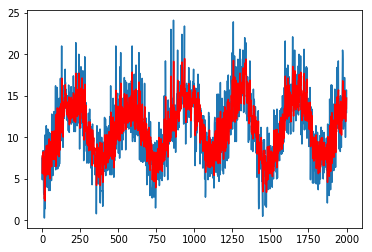

In [21]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

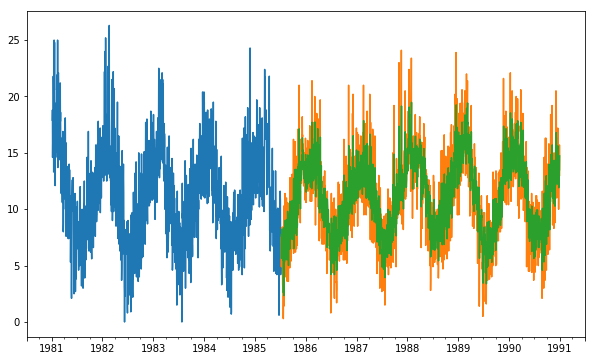

In [22]:
pre=pd.Series(predictions, index=testS.index)

plt.figure(figsize=(10,6));
trainS.loc['1950':].plot()
testS.plot()
pre.plot()
plt.show()

predicted=7.738295, expected=7.500000
predicted=7.604087, expected=4.900000
predicted=5.659902, expected=5.900000
predicted=6.511230, expected=7.800000
predicted=7.445662, expected=5.800000
predicted=6.361309, expected=7.000000
predicted=7.444866, expected=8.400000
predicted=8.243610, expected=6.200000
predicted=6.603307, expected=7.500000
predicted=7.657376, expected=4.800000
predicted=6.036691, expected=3.300000
predicted=5.601762, expected=3.200000
predicted=5.531487, expected=7.000000
predicted=7.393171, expected=8.400000
predicted=7.607208, expected=0.300000
predicted=2.628348, expected=0.300000
predicted=3.563671, expected=2.100000
predicted=4.261306, expected=8.500000
predicted=7.517336, expected=1.400000
predicted=2.405120, expected=4.100000
predicted=5.544736, expected=10.300000
predicted=8.433630, expected=6.600000
predicted=5.786903, expected=6.100000
predicted=5.325826, expected=7.000000
predicted=6.738679, expected=5.100000
predicted=5.691595, expected=6.300000
predicted=6

predicted=14.715275, expected=14.200000
predicted=13.320646, expected=14.300000
predicted=13.953520, expected=13.300000
predicted=12.785909, expected=16.700000
predicted=15.440979, expected=15.300000
predicted=13.976117, expected=14.300000
predicted=14.420759, expected=13.500000
predicted=13.886045, expected=15.000000
predicted=14.779679, expected=13.600000
predicted=13.406621, expected=15.200000
predicted=14.556676, expected=17.000000
predicted=15.559459, expected=18.700000
predicted=16.488856, expected=16.500000
predicted=15.012304, expected=17.400000
predicted=15.737997, expected=18.300000
predicted=16.344102, expected=18.300000
predicted=16.314389, expected=22.400000
predicted=19.226441, expected=21.400000
predicted=18.325726, expected=20.900000
predicted=18.631660, expected=17.600000
predicted=16.579642, expected=15.500000
predicted=16.070280, expected=16.600000
predicted=16.671311, expected=16.200000
predicted=16.506988, expected=15.600000
predicted=16.054650, expected=14.500000


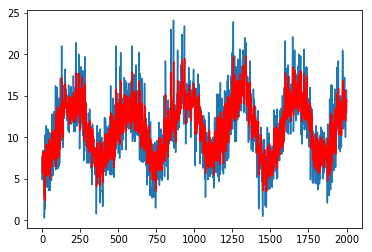

In [23]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

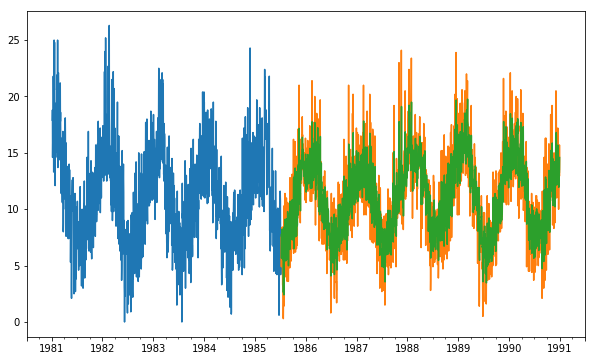

In [24]:
pre=pd.Series(predictions, index=testS.index)

plt.figure(figsize=(10,6));
trainS.loc['1950':].plot()
testS.plot()
pre.plot()
plt.show()

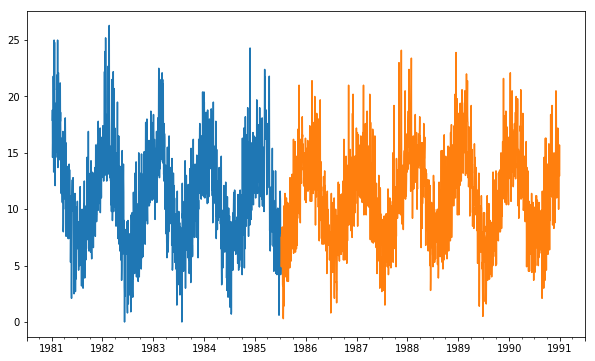

In [25]:
plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Test RMSE: 2.439


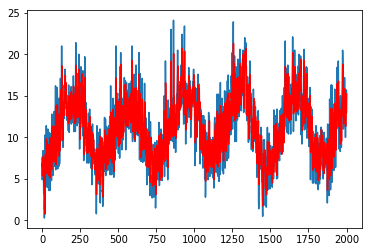

In [26]:
from statsmodels.tsa.arima_model import ARIMA

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [27]:
model = ARIMA(history, order=(4,1,0))
model_fit = model.fit()
# one step forecast
yhat = model_fit.forecast()[0]

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [28]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

history = [x for x in train]
#(start='1985-07-09',end='1990-12-30', dynamic=True)
history
model = ARIMA(trainS, order=(4,2,0))
model_fit = model.fit()
model_fit.forecast()[0]

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([7.07322181])

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


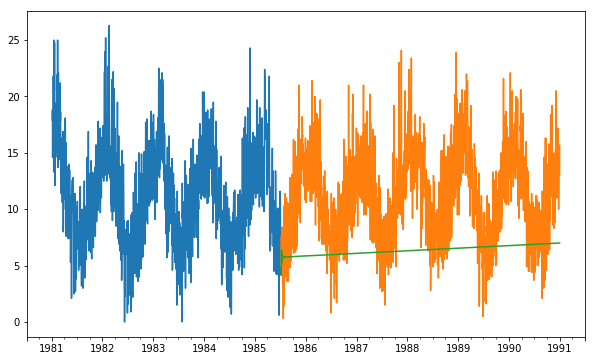

In [29]:
predictions1 = model_fit.predict(start='1985-07-09',end='1990-12-30', dynamic=True, typ ='levels')
predictions = []
# for t in range(len(test)):
#     predictions.append(model_fit.forecast()[0][0])
# predictionsS=pd.Series(predictions,index=rng2)

plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
# predictionsS.plot()
predictions1.plot()
plt.show()

https://stats.stackexchange.com/questions/229948/plotting-predicted-values-in-arima-time-series-in-r

In [30]:
model_fit.forecast(len(predictions1))[0]

array([   7.07322181,    7.95547085,    8.7875727 , ..., 2255.59539785,
       2257.3466753 , 2259.09857924])

In [31]:
model_fit.forecast(len(predictions1))[1]

array([3.11265191e+00, 4.61034540e+00, 5.89365025e+00, ...,
       4.45554501e+04, 4.45888538e+04, 4.46222658e+04])

In [32]:
model_fit.forecast(len(predictions1))[2]

array([[ 9.72536184e-01,  1.31739074e+01],
       [-1.08064009e+00,  1.69915818e+01],
       [-2.76376953e+00,  2.03389149e+01],
       ...,
       [-8.50714821e+04,  8.95826729e+04],
       [-8.51352009e+04,  8.96498942e+04],
       [-8.51989354e+04,  8.97171325e+04]])

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


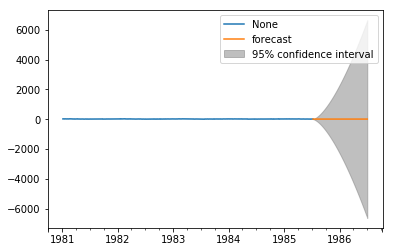

In [33]:
fig, ax = plt.subplots()
ax = trainS.loc['1980':].plot()
fig = model_fit.plot_predict('1985-07-09','1986-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()